# **Water quality**
\
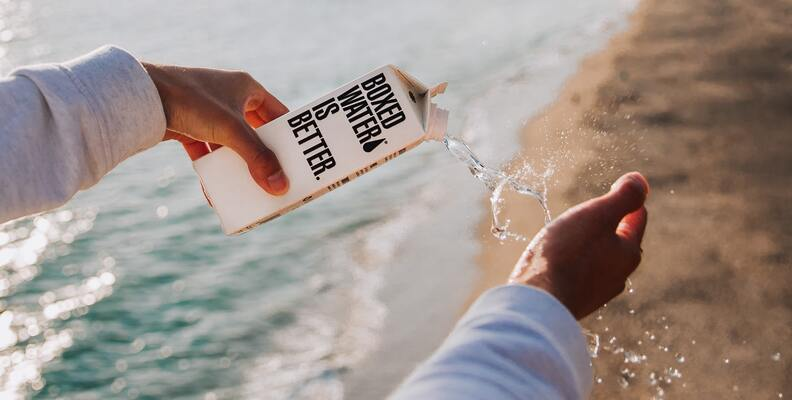

###**Source:**[Kaggle](https://www.kaggle.com/datasets/mssmartypants/water-quality/data)
###**Content:**
1. aluminium: dangerous if greater than 2.8
2. ammonia: dangerous if greater than 32.5
3. arsenic: dangerous if greater than 0.01
4. barium: dangerous if greater than 2
5. cadmium: dangerous if greater than 0.005
6. chloramine: dangerous if greater than 4
7. chromium: dangerous if greater than 0.1
8. copper: dangerous if greater than 1.3
9. flouride: dangerous if greater than 1.5
10. bacteria: dangerous if greater than 0
11. viruses: dangerous if greater than 0
12. lead: dangerous if greater than 0.015
13. nitrates: dangerous if greater than 10
14. nitrites: dangerous if greater than 1
15. mercury: dangerous if greater than 0.002
16. perchlorate: dangerous if greater than 56
17. radium: dangerous if greater than 5
18. selenium: dangerous if greater than 0.5
19. silver: dangerous if greater than 0.1
20. uranium: dangerous if greater than 0.3

21. is_safe: {0 - not safe, 1 - safe}  # class attribute


In [11]:
#Importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

In [12]:
# Load the dataset
data = pd.read_csv('/content/waterQuality1.csv')

In [13]:
#Printing the dataset
data.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [14]:
##finding the datatypes,colums and rows /information of the data provided
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

➡ The dataset has 7999 rows andd 21 colomns

➡ All the data seems to numerical, except is_safe, ammonia has categorial data, and there are no missing values

In [18]:
# Displaying the unique values and their counts for 'ammonia' and 'is_safe'
print(data['ammonia'].value_counts())
print(data['is_safe'].value_counts())


ammonia
0.17     13
0.37     13
0.12     13
13.74    12
0.75     11
         ..
11.09     1
20.13     1
7.30      1
22.60     1
10.03     1
Name: count, Length: 2564, dtype: int64
is_safe
0        7084
1         912
#NUM!       3
Name: count, dtype: int64


In [16]:
# Convert 'ammonia' column to numeric, coercing errors to NaN
data['ammonia'] = pd.to_numeric(data['ammonia'], errors='coerce')

# Fill NaN values in 'ammonia' (if any) with a suitable method (e.g., mean, median, or 0)
data['ammonia'].fillna(data['ammonia'].mean(), inplace=True) #Example using mean

#Now you can check the data type of ammonia
print(data['ammonia'].dtype)

float64


➡ filling the null if there are any with mean and converting the datatype of ammonia th float,since there is no categorial data in the colomn

In [19]:
# Replace 'num3' in 'is_safe' column with appropriate value
data['is_safe'] = data['is_safe'].replace('#NUM!', '1') # Example replacing with 1

#Check value counts of is_safe
print(data['is_safe'].value_counts())

is_safe
0    7084
1     915
Name: count, dtype: int64


In [20]:
#Describe the data
data.describe()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
count,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000
mean,0.666158,14.278212,0.161445,1.567715,0.042806,2.176831,0.247226,0.805857,0.771565,0.319665,0.328583,0.099450,9.818822,1.329961,0.005194,16.460299,2.920548,0.049685,0.147781,0.044673
std,1.265145,8.877265,0.252590,1.216091,0.036049,2.567027,0.270640,0.653539,0.435373,0.329485,0.378096,0.058172,5.541331,0.573219,0.002967,17.687474,2.323009,0.028770,0.143551,0.026904
min,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.580000,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.405000,0.000000,0.002000,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000
50%,0.070000,14.130000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,0.008000,0.102000,9.930000,1.420000,0.005000,7.740000,2.410000,0.050000,0.080000,0.050000
75%,0.280000,22.130000,0.100000,2.480000,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,0.700000,0.151000,14.610000,1.760000,0.008000,29.480000,4.670000,0.070000,0.240000,0.070000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000


➡ There are some coloms with huge difference between 75% to max values indicating there might be skewness or potential outliers .So plotting histogram and boxplot for better understanding.

In [17]:
#find the null values
data.isnull().sum()

,0
aluminium,0
ammonia,0
arsenic,0
barium,0
cadmium,0
chloramine,0
chromium,0
copper,0
flouride,0
bacteria,0


➡ There are no null values

In [21]:
#Class distribution values counts for label
data['is_safe'].value_counts(normalize=True)*100

,proportion
is_safe,
0,88.56107
1,11.43893


➡ There is huge imbalance in percentage of classes in is_safe which could impact model performance so this should be addressed with techniques like resampling or class weight adjustment.

In [22]:
#Print the duplicated rows
data.duplicated().sum()

np.int64(0)

➡ There are no duplicate values

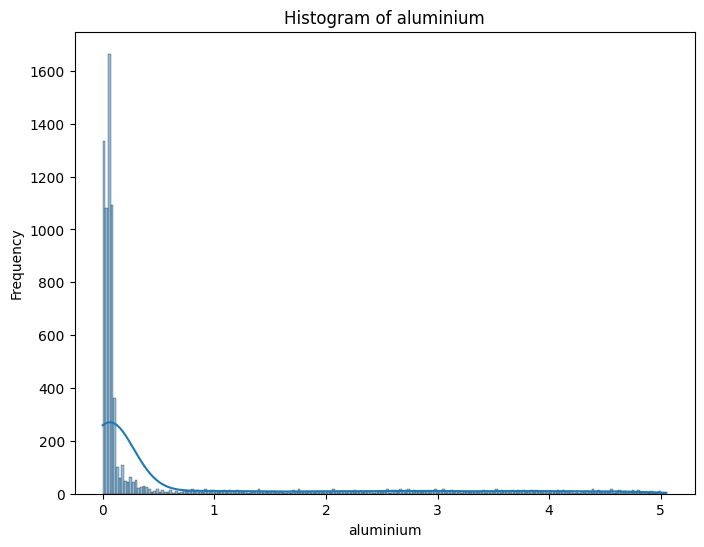

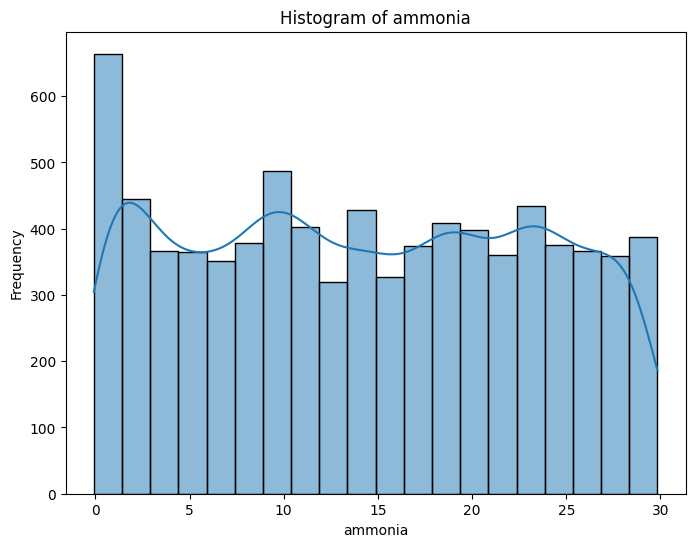

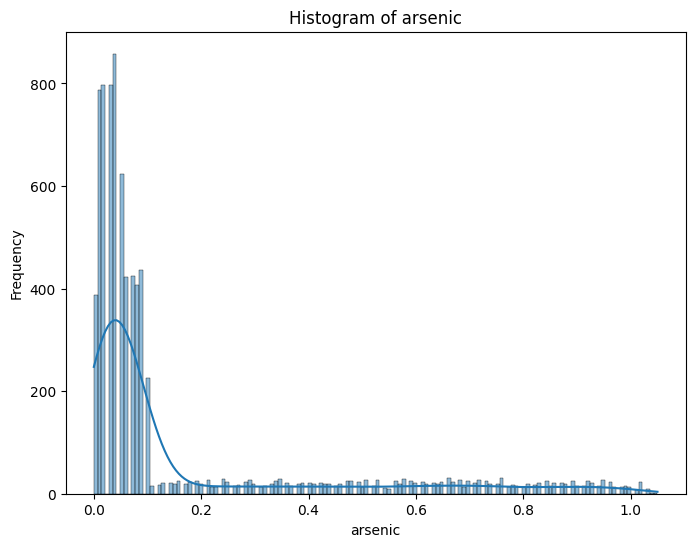

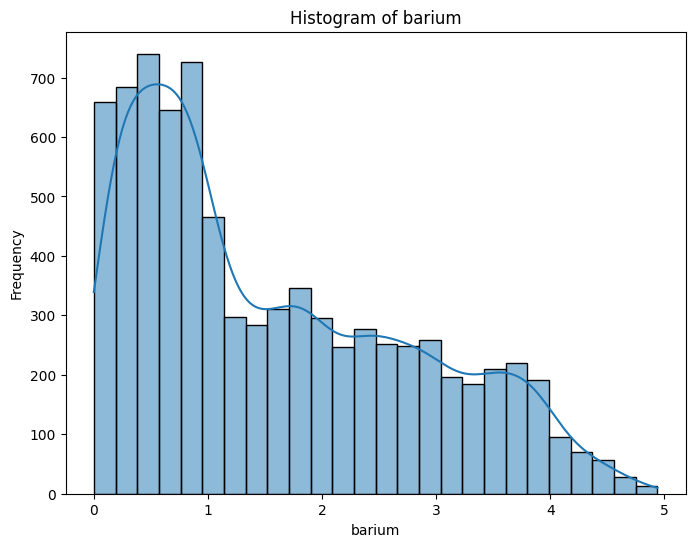

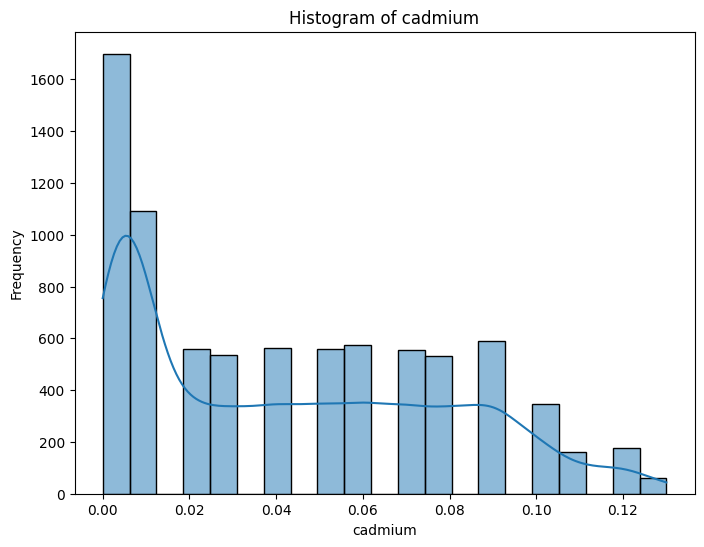

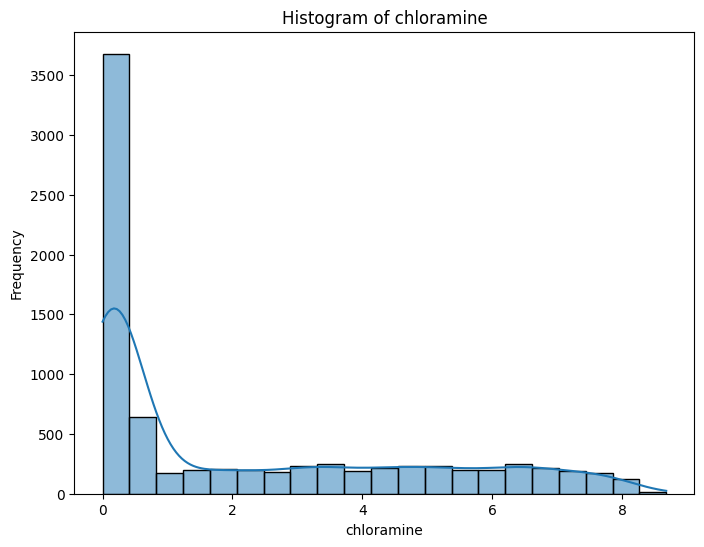

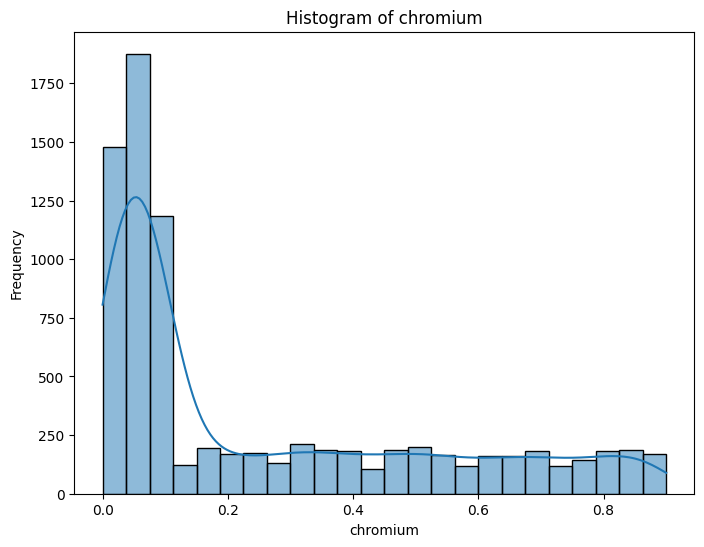

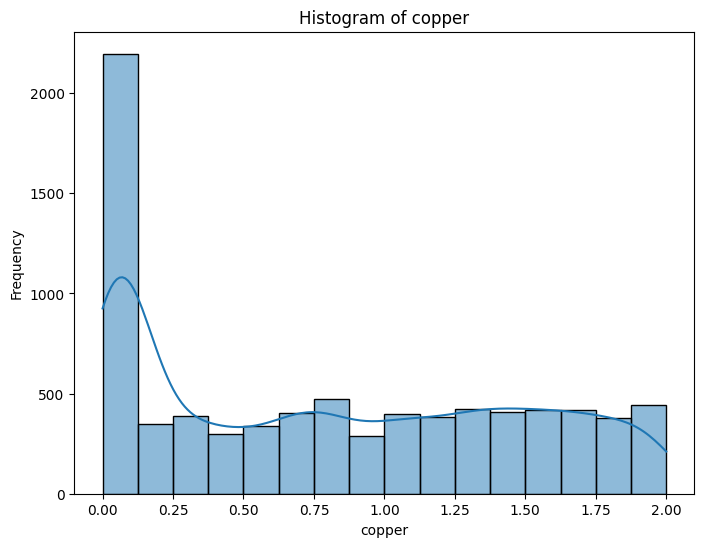

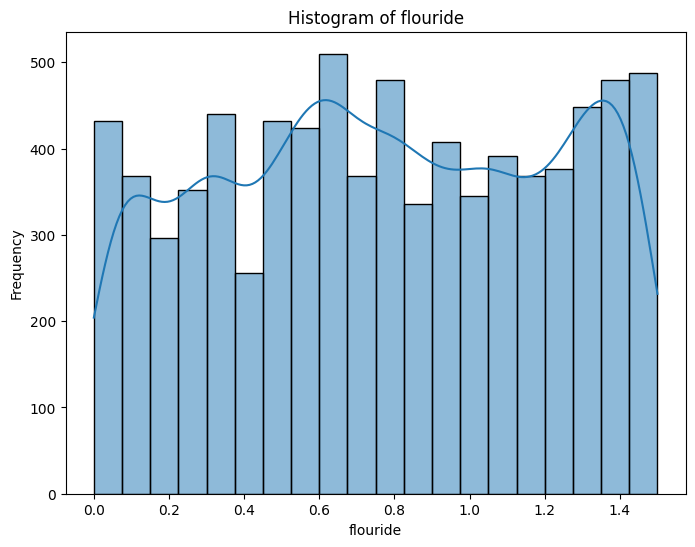

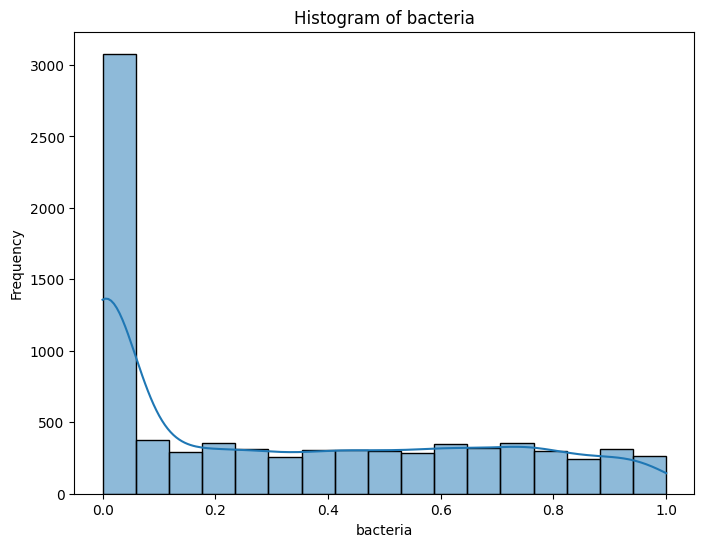

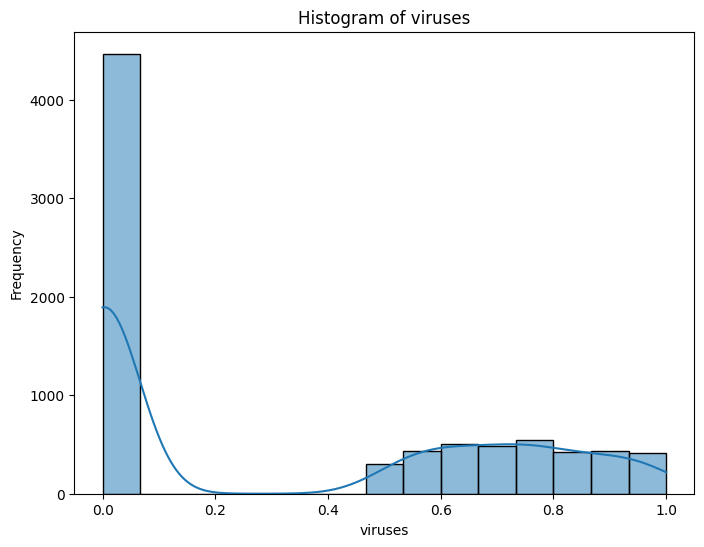

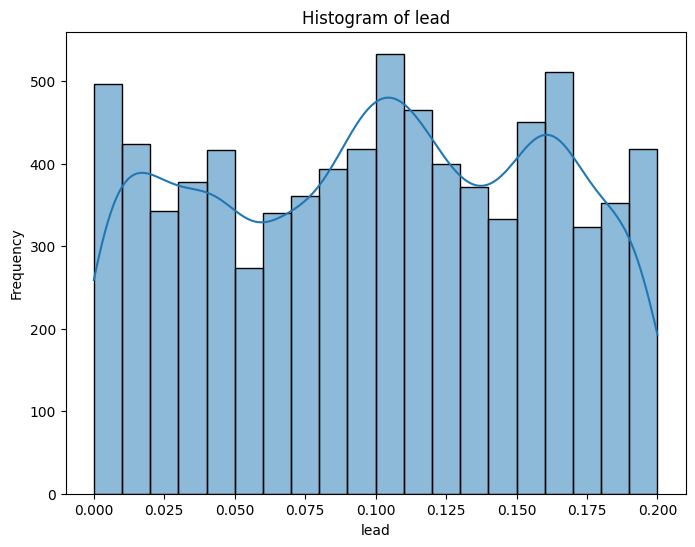

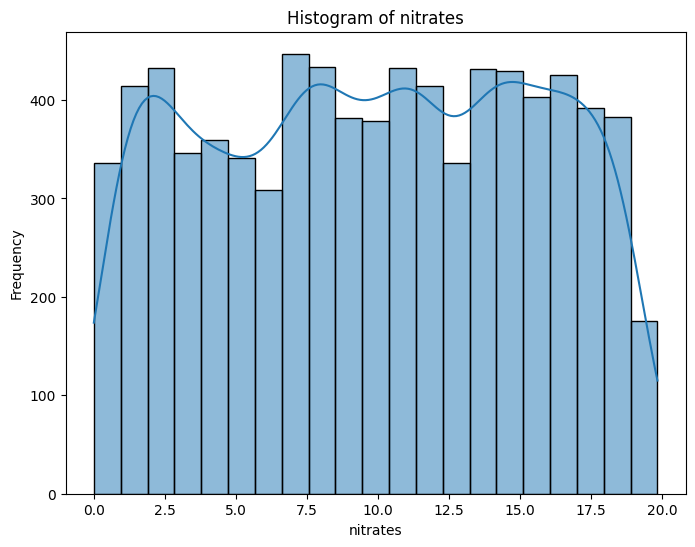

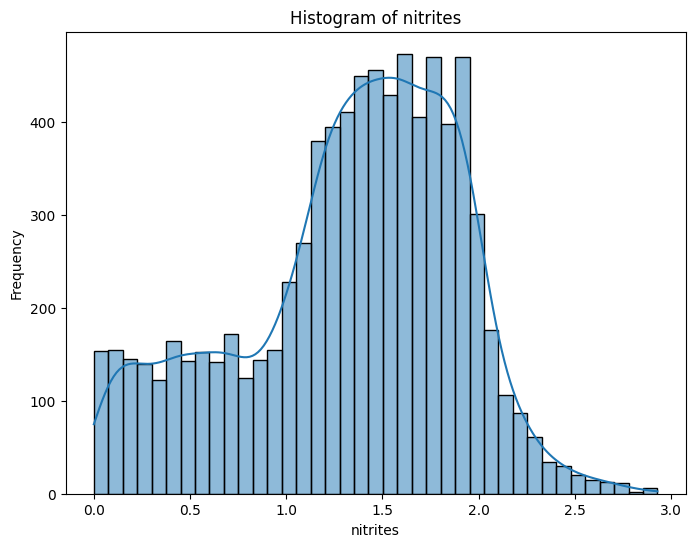

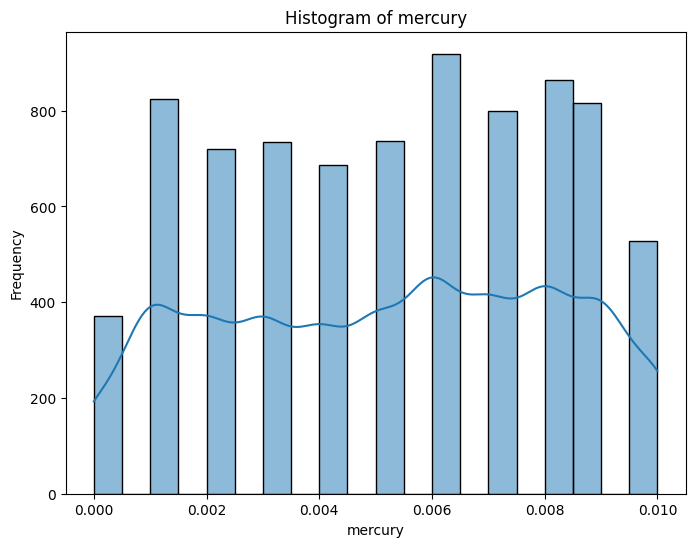

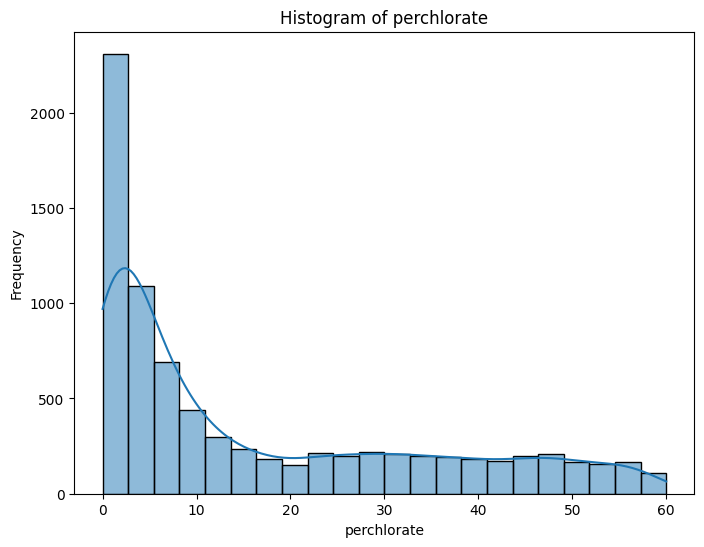

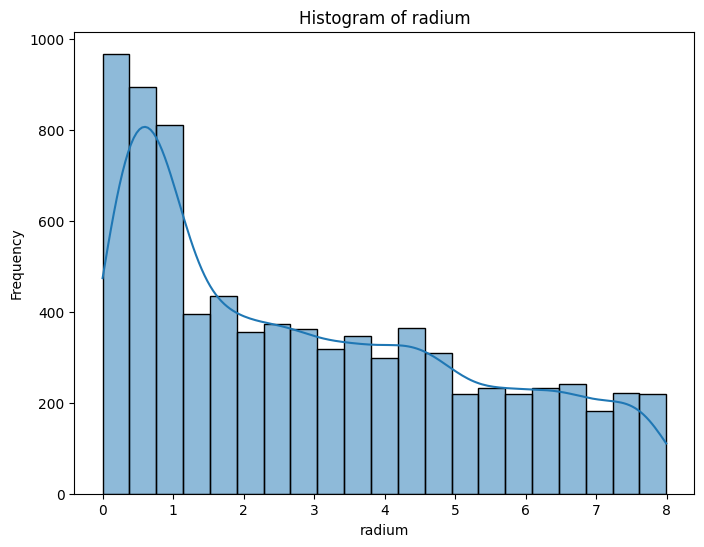

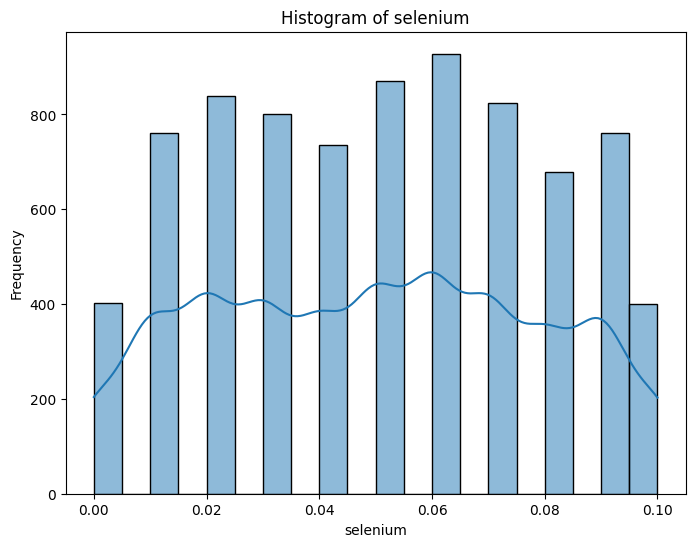

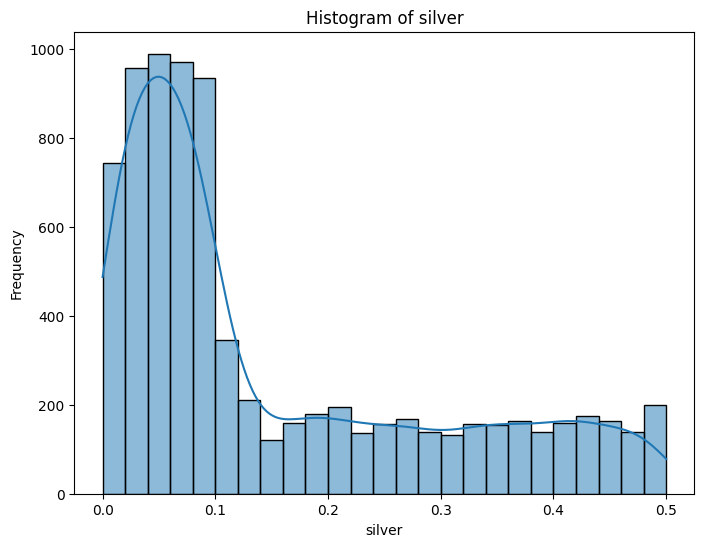

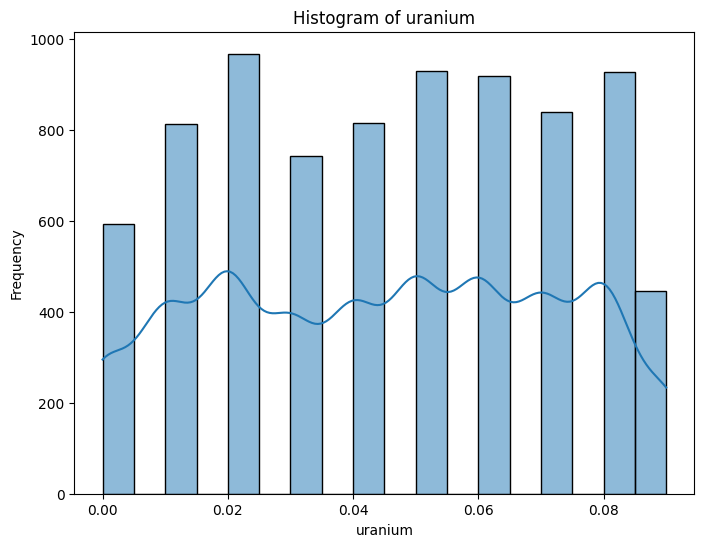

In [23]:
# histograms for numerical columns
numerical_cols = data.select_dtypes(include=np.number).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

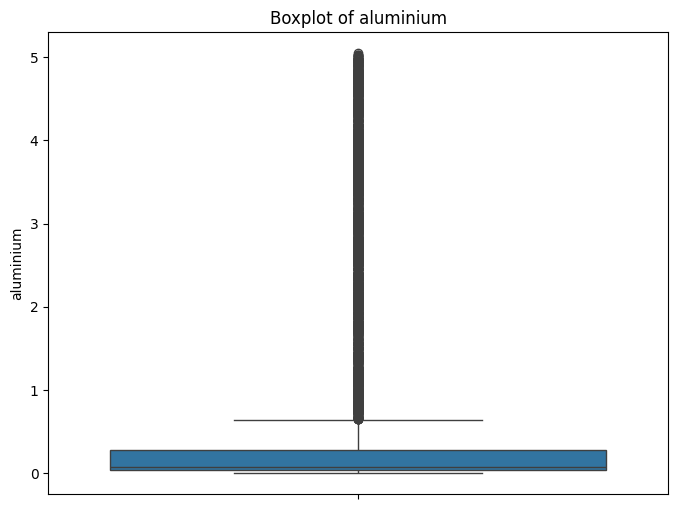

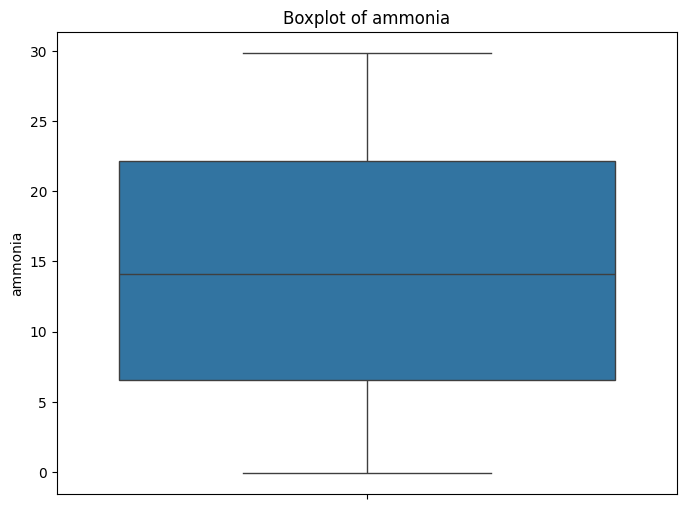

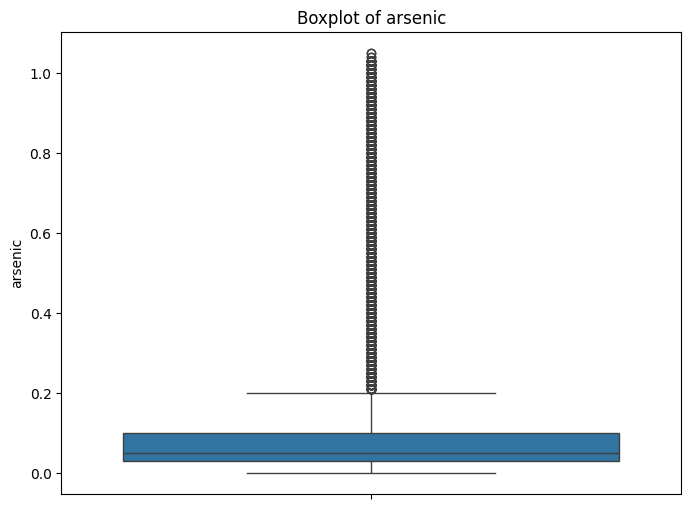

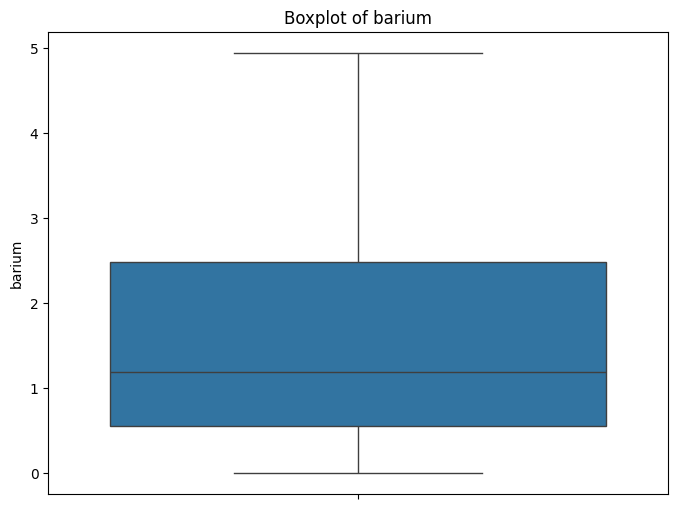

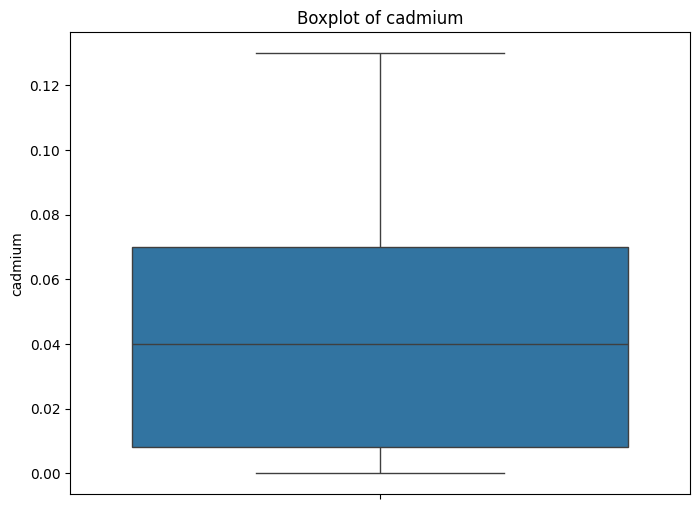

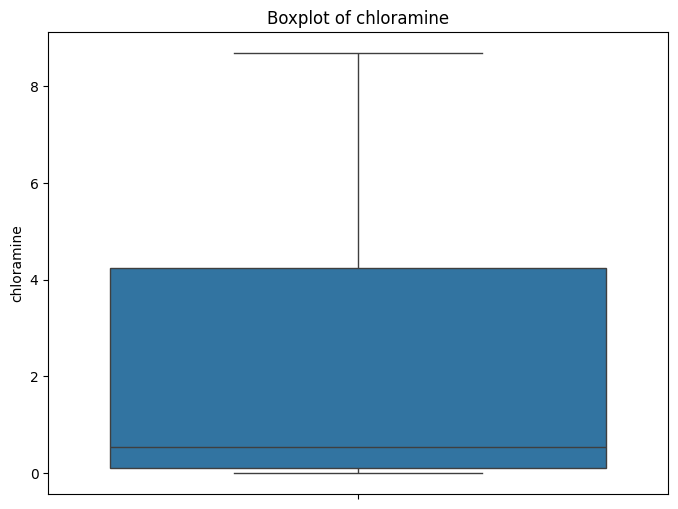

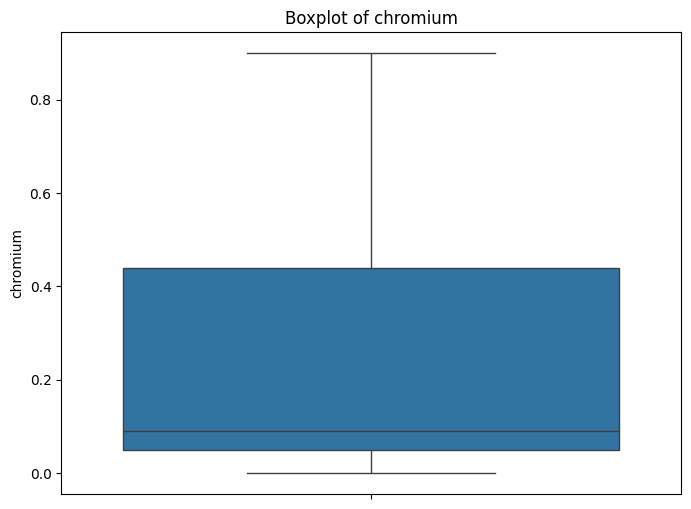

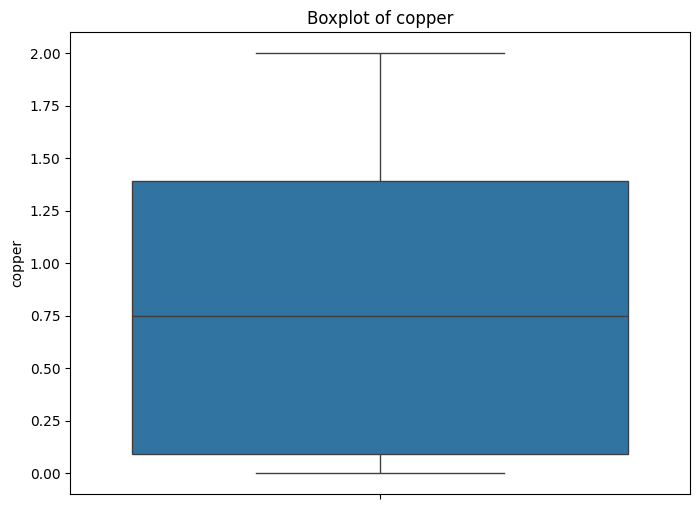

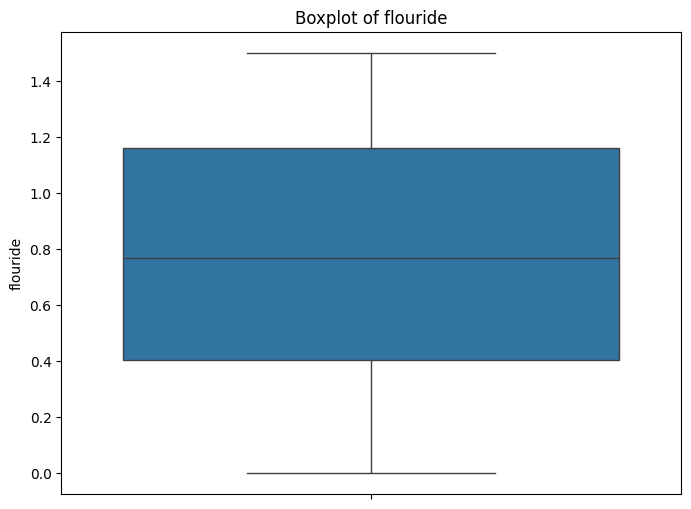

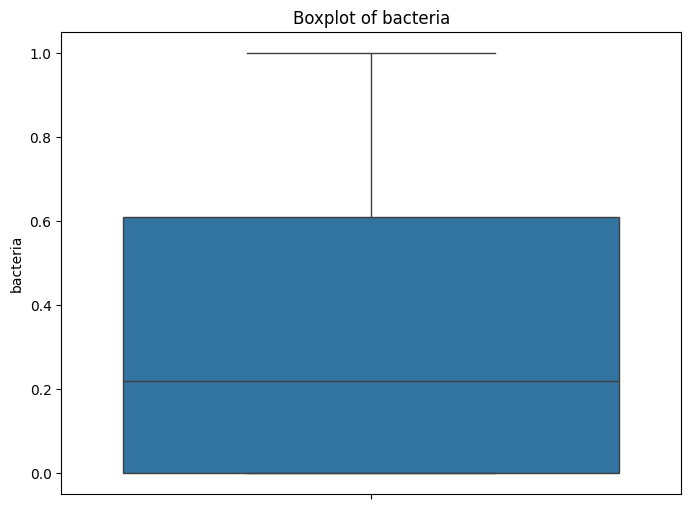

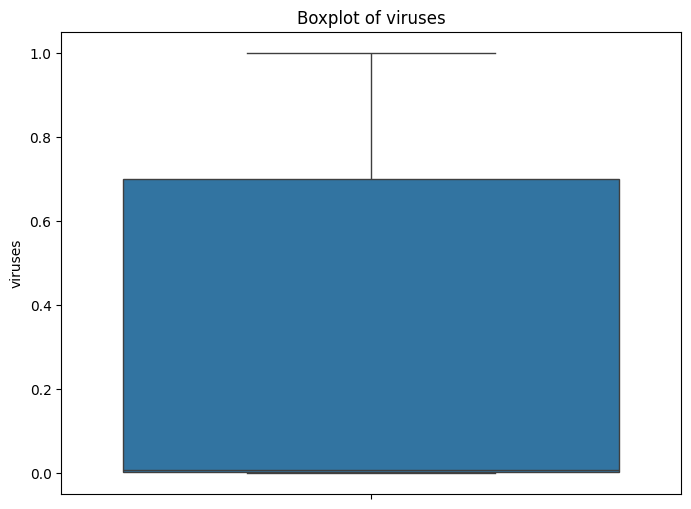

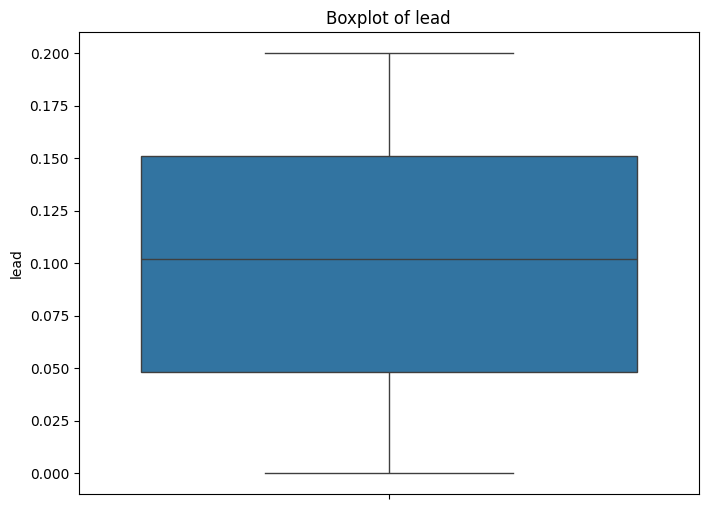

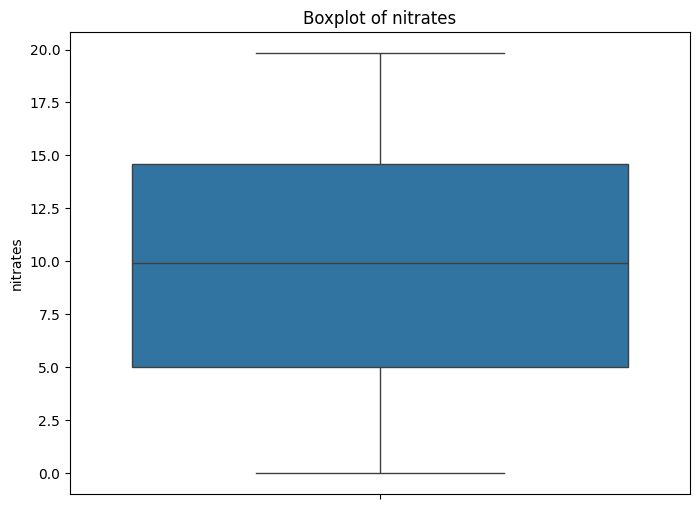

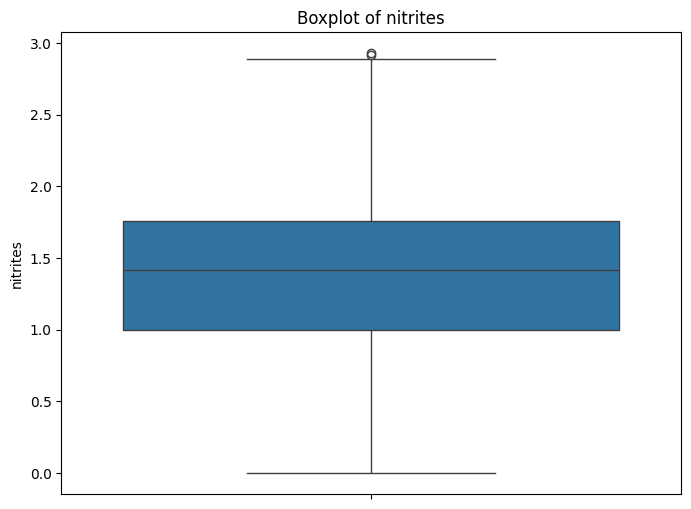

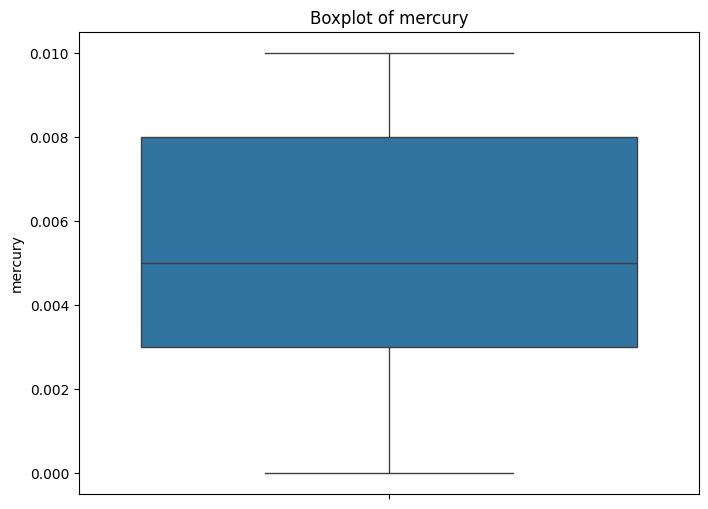

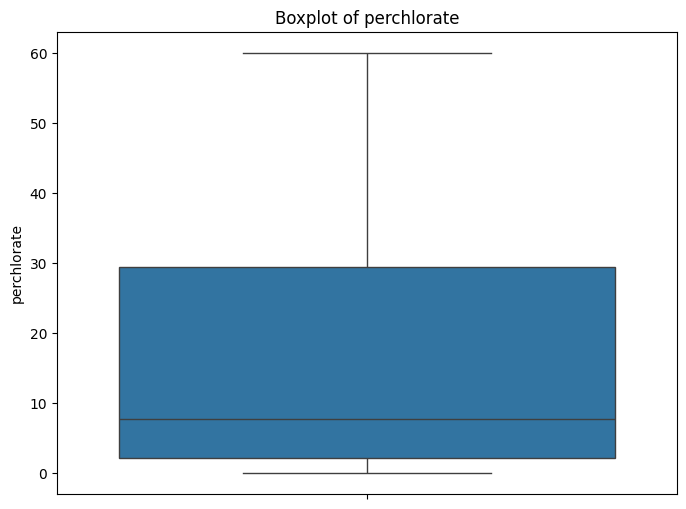

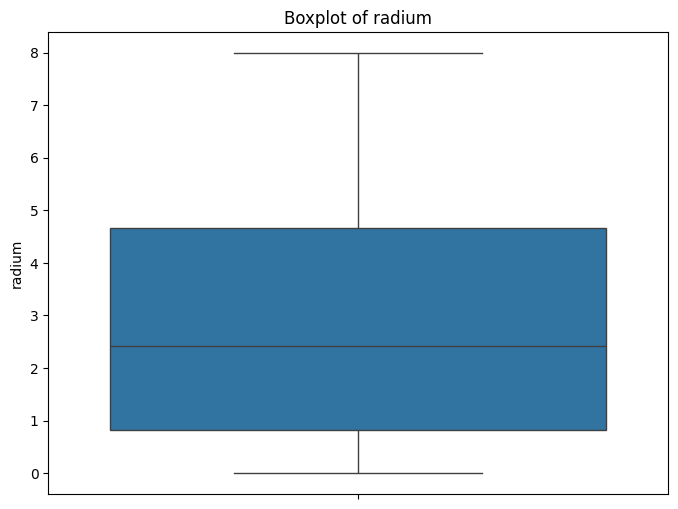

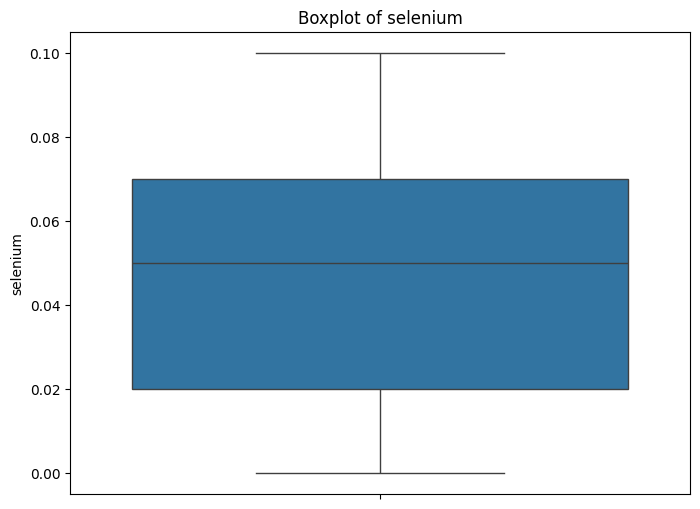

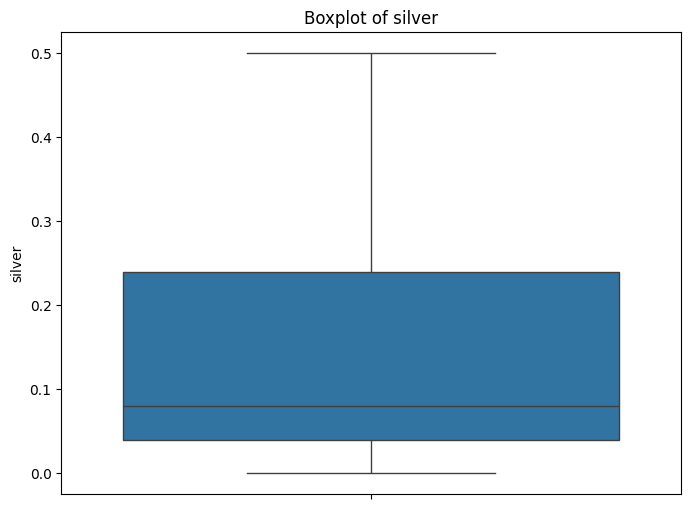

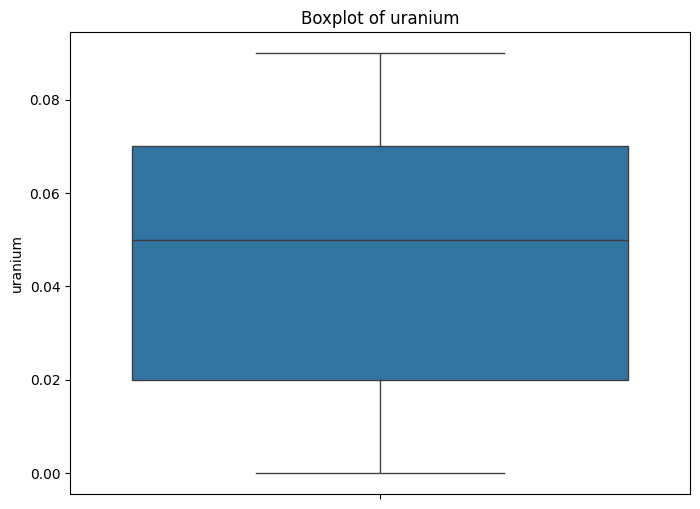

In [26]:
# boxplots for numerical columns
numerical_cols = data.select_dtypes(include=np.number).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()

➡ There are many outliers present in aluminium and arsenic so fix those with IQR method

In [28]:
#Fixing the outliers for coloumns with continous data
def fix_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound),
                         df[column].median(), df[column])
    return df

# Apply the function to the specified columns
for col in ['aluminium', 'arsenic', 'nitrites']:
    data = fix_outliers(data, col)

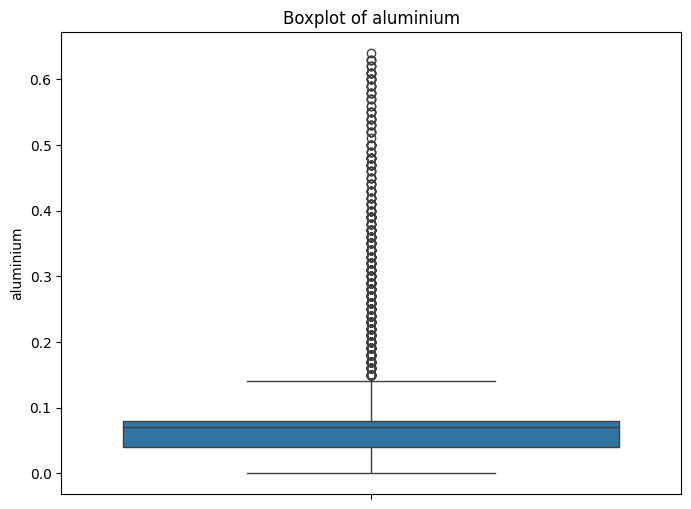

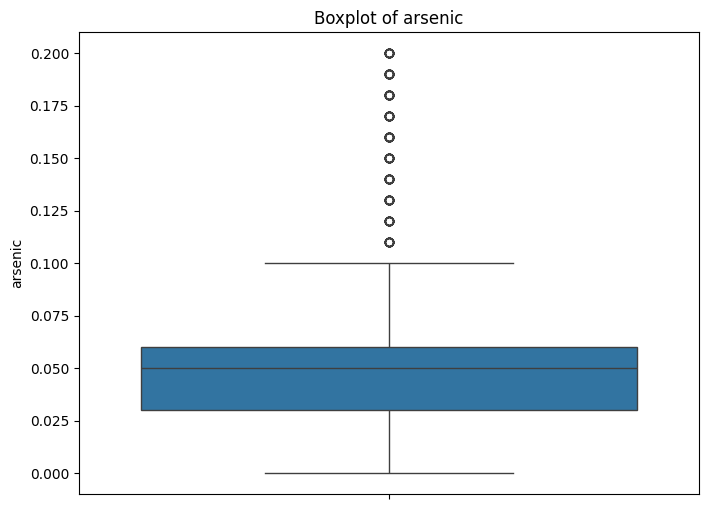

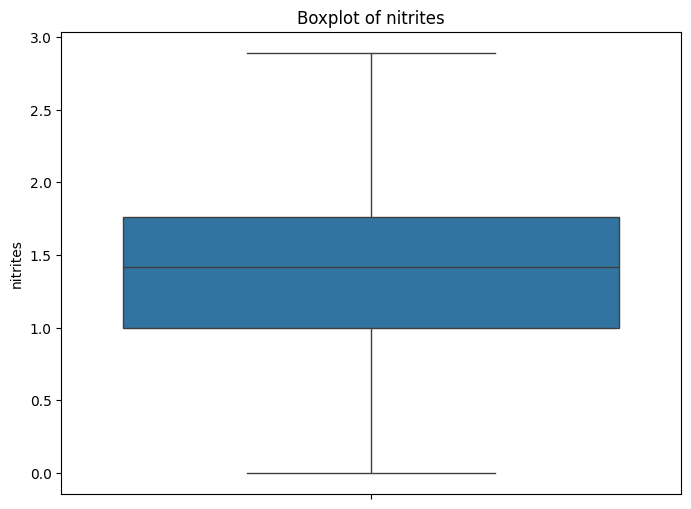

In [29]:
# Plotting boxplots for each column
for col in ['aluminium', 'arsenic', 'nitrites']:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()

➡ Most outliers are fixed but still few outliers can be seen this be the pattern in the data

In [33]:
#Print the shape of dataset
data.shape

(7999, 21)

In [35]:
# Split into features and target
X = data.drop(['is_safe'], axis=1)  # Dropping ID as it's not a predictive feature
y = data['is_safe']

In [36]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Check class distribution
print("Training set class distribution:")
print(y_train.value_counts())
print("\nTest set class distribution:")
print(y_test.value_counts())

Training set class distribution:
is_safe
0    4959
1     640
Name: count, dtype: int64

Test set class distribution:
is_safe
0    2125
1     275
Name: count, dtype: int64


1. The data was split into training (5599 samples) and testing (2400 samples) sets

2. Stratified sampling ensured the class distribution was maintained in both sets

3. The ID column was dropped as it's not a meaningful feature for prediction

➡ Random Forest algorithms typically don't require feature scaling (normalization or standardization) for several fundamental reasons:

1. Nature of Decision Trees
Random Forests are ensembles of decision trees, and decision trees have properties that make scaling unnecessary:

 * Splitting based on values: Decision trees make splits by comparing feature values to thresholds, not by calculating distances

 * Order preservation: Scaling maintains the order of values, so splits would be identical before and after scaling

 * No distance calculations: Unlike algorithms like KNN or SVM, trees don't use Euclidean distance or other distance metrics

In [37]:
# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
print("Initial Random Forest Performance:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

Initial Random Forest Performance:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      2125
           1       0.77      0.51      0.61       275

    accuracy                           0.93      2400
   macro avg       0.86      0.74      0.79      2400
weighted avg       0.92      0.93      0.92      2400

Confusion Matrix:
[[2084   41]
 [ 135  140]]
Accuracy: 0.9267


1. class_weight='balanced' is given because we can observe most of the target variable has datapoints belonging to class 0 (~ 89%) and class 1(~ 11%). So inorder to remove the biasing towards class 0  we  give classweight has balanced

1. Metrics/performance:
- Accuracy (93%): Looks high but misleading due to class imbalance.
- Minority Class (Class 1):
  - Precision: 77% → Most positive predictions are wrong.
  - Recall: 51% → Model misses 49% of actual positives cases.
  - F1-Score: 5% → Very poor for minority detection.
- Majority Class (Class 0):
  - High recall (98%) but lower precision (94%).
2. Key Problems

- Bias Toward Majority Class: Ignores Class 1 almost entirely.
- Severe Class Imbalance (89-11 split).
- Poor Handling of Imbalance: Stratification/class weights weren’t enough.
3. Conclusion
- Eventhough class weight is balanced it's still observed the model is biased towards class 0. So we try resampling the data using smote technique

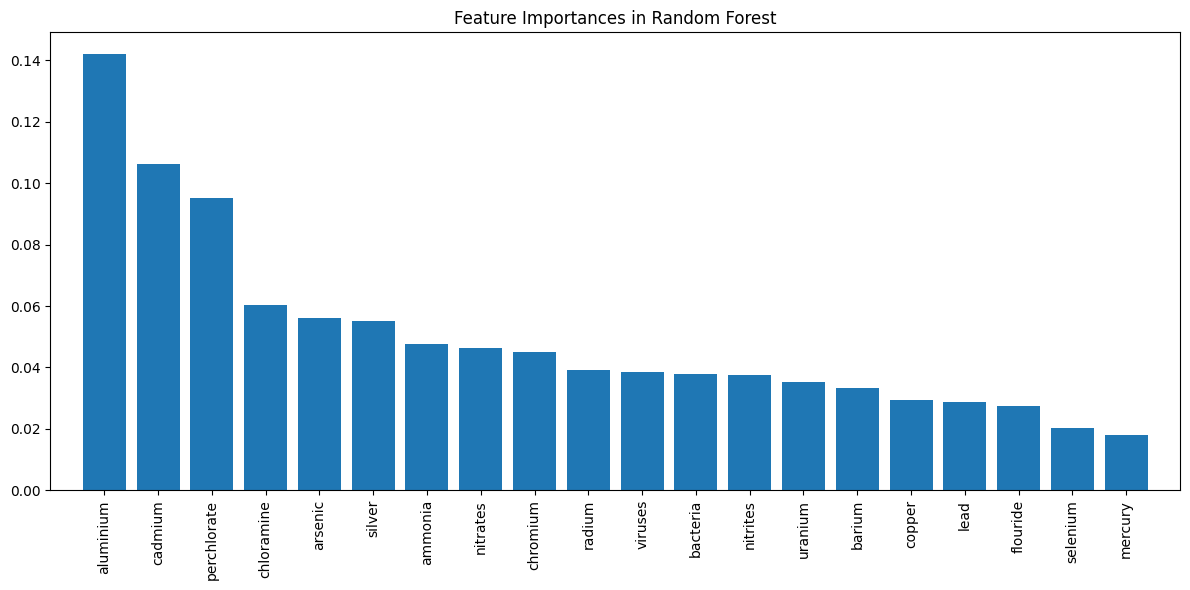


Top 10 Most Important Features:
1. aluminium: 0.1421
2. cadmium: 0.1064
3. perchlorate: 0.0951
4. chloramine: 0.0603
5. arsenic: 0.0562
6. silver: 0.0550
7. ammonia: 0.0478
8. nitrates: 0.0463
9. chromium: 0.0450
10. radium: 0.0392


In [43]:
# Get feature importances
importances = rf.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances in Random Forest")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

# Print top features
print("\nTop 10 Most Important Features:")
for i in range(10):
    print(f"{i+1}. {features[indices[i]]}: {importances[indices[i]]:.4f}")

In [40]:
#Training and testing metrics for rf model
print('Training Accuracy :', np.round(metrics.accuracy_score(y_train, rf.predict(X_train)),3))
print('Training Precision :', np.round(metrics.precision_score(y_train, rf.predict(X_train), average='weighted'),3))
print('Training Recall :' , np.round(metrics.recall_score(y_train, rf.predict(X_train), average='weighted'),3))
print('Training F1 Score :' , np.round(metrics.f1_score(y_train, rf.predict(X_train), average='weighted'),3))
print('\nTesting Accuracy :' ,  np.round(metrics.accuracy_score(y_test, y_pred),3))
print('Testing Precision :' , np.round(metrics.precision_score(y_test, y_pred, average='weighted'),3))
print('Testing Recall :' , np.round(metrics.recall_score(y_test, y_pred, average='weighted'),3))
print('Testing F1 Score :' , np.round(metrics.f1_score(y_test, y_pred, average='weighted'),3))

Training Accuracy : 0.997
Training Precision : 0.997
Training Recall : 0.997
Training F1 Score : 0.997

Testing Accuracy : 0.927
Testing Precision : 0.92
Testing Recall : 0.927
Testing F1 Score : 0.92


➡ The testing accuracy, precision and recall is high 92.7 and there dose not seems to be huge diff between training and testing accuracy but the recall for class 1 is low ,so there seems to be biasing towards class 0 , this should be reduced and recall should be increase to avoid false negative cases

In [41]:
# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the class distribution after resampling
print("Training set class distribution after SMOTE:")
print(y_train_resampled.value_counts())


Training set class distribution after SMOTE:
is_safe
0    4959
1    4959
Name: count, dtype: int64


# smote

SMOTE (Synthetic Minority Over-sampling Technique) is a technique used to address class imbalance in datasets.  It works by creating synthetic samples of the minority class, rather than simply duplicating existing ones.  This helps to balance the class distribution without introducing bias from over-representation of existing minority class examples.  It does this by selecting a minority class instance and finding its k-nearest neighbors (also from the minority class).  New synthetic instances are then created along the line segments connecting these instances.  This generates new data points that are similar to the existing minority class examples but not identical, effectively increasing the size of the minority class and improving model performance.


Baseline Model Performance:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      2125
           1       0.56      0.61      0.58       275

    accuracy                           0.90      2400
   macro avg       0.76      0.77      0.76      2400
weighted avg       0.90      0.90      0.90      2400

Accuracy: 0.9008


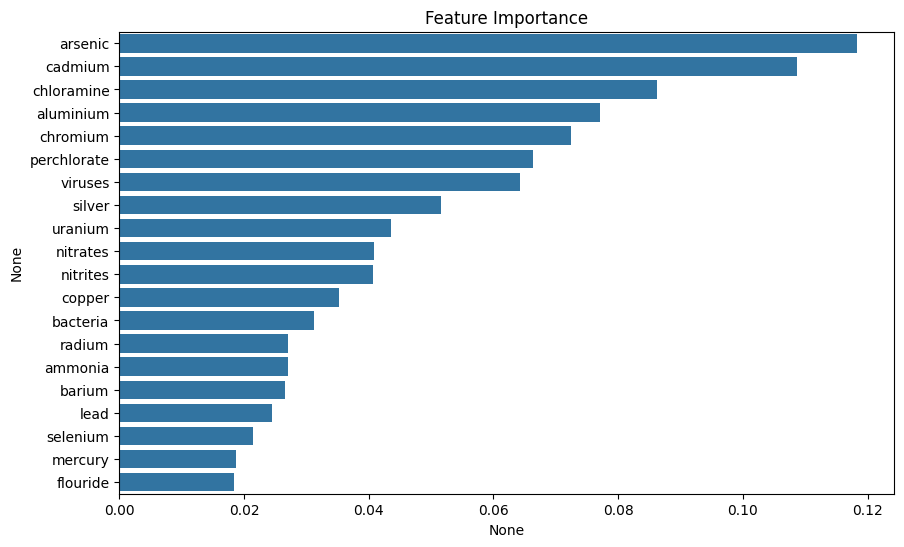

In [42]:
# Initialize and train baseline model
rf_resampled = RandomForestClassifier(random_state=42)
rf_resampled.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred = rf_resampled.predict(X_test)

# Evaluation
print("Baseline Model Performance:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Feature importance
feature_imp = pd.Series(rf_resampled.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title('Feature Importance')
plt.show()

Inference:
1. The resampled model achieved 90% accuracy

2. Performance on class 0 (precision 0.95, recall 0.94) than class 1 (precision 0.56, recall 0.61). There is a slight increase in recall for class 1 but still could be increased using class weights

3. The feature importance plot shows which contaminants most affect water safety

4. Top important features typically include: arsenic, cadmium, chloramine, aluminium,chromium, perchlorate, viruses, silver, etc.

5. Some features show very low importance and could potentially be removed

6. Ammonia (ammonia) is moderately important but not among the top predictors



In [44]:
#Print testing and training metrics
print('Training Accuracy :', np.round(metrics.accuracy_score(y_train_resampled, rf_resampled.predict(X_train_resampled)),3))
print('Training Precision :', np.round(metrics.precision_score(y_train_resampled, rf_resampled.predict(X_train_resampled), average='weighted'),3))
print('Training Recall :' , np.round(metrics.recall_score(y_train_resampled, rf_resampled.predict(X_train_resampled), average='weighted'),3))
print('Training F1 Score :' , np.round(metrics.f1_score(y_train_resampled, rf_resampled.predict(X_train_resampled), average='weighted'),3))
print('\nTesting Accuracy :' ,  np.round(metrics.accuracy_score(y_test, y_pred),3))
print('Testing Precision :' , np.round(metrics.precision_score(y_test, y_pred, average='weighted'),3))
print('Testing Recall :' , np.round(metrics.recall_score(y_test, y_pred, average='weighted'),3))
print('Testing F1 Score :' , np.round(metrics.f1_score(y_test, y_pred, average='weighted'),3))

Training Accuracy : 0.998
Training Precision : 0.998
Training Recall : 0.998
Training F1 Score : 0.998

Testing Accuracy : 0.901
Testing Precision : 0.904
Testing Recall : 0.901
Testing F1 Score : 0.902


➡ After resampling , The precision and recall for
  * class 0(precision 0.95, recall 0.94)
  * class 1(precision 0.56, recall 0.61)

➡ although the precision is decreased the recall seems to increse for sampling model.

➡ The overall testing accuracy and recall seems to have decreased by 2% from 92% to 90% whereas, there is an decrease in recall from 92% to 90.1% but still our priority should be recall in class balance as we don't want any false negative cases (type 2 ) error

In [45]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Perform grid search
grid_search.fit(X_train, y_train)

# Get best parameters
best_params = grid_search.best_params_
print("\nBest Parameters:")
print(best_params)

# Evaluate best model
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

print("\nOptimized Random Forest Performance:")
print(classification_report(y_test, y_pred_best))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))
print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits

Best Parameters:
{'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}

Optimized Random Forest Performance:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2125
           1       0.85      0.60      0.70       275

    accuracy                           0.94      2400
   macro avg       0.90      0.79      0.83      2400
weighted avg       0.94      0.94      0.94      2400

Confusion Matrix:
[[2095   30]
 [ 111  164]]
Accuracy: 0.9413


1. Grid search finds the optimal combination of hyperparameters

2. Typical best parameters might include:

  * n_estimators: 200-300

  * max_depth: 20-30 or None

  * min_samples_split: 2-5

  * min_samples_leaf: 1-2

3. The optimized model usually shows slight improvement over others as there is is increase in accuracy as well as the precision and recall for class1
 *  class 0 (precision(0.95) , recall (0.99))
 * class 1 (precision(0.85) , recall (0.60))

In [48]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on best model
cv_scores = cross_val_score(best_rf, X, y, cv=5)

print("\nCross-Validation Scores:")
print(cv_scores)
print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation: {np.std(cv_scores):.4f}")


Cross-Validation Scores:
[0.710625   0.71125    0.903125   0.945625   0.89243277]
Mean CV Accuracy: 0.8326
Standard Deviation: 0.1009


In [49]:
# Feature importance from optimized model
optimized_importances = best_rf.feature_importances_
optimized_indices = np.argsort(optimized_importances)[::-1]

print("\nTop 10 Features from Optimized Model:")
for i in range(10):
    print(f"{i+1}. {features[optimized_indices[i]]}: {optimized_importances[optimized_indices[i]]:.4f}")

# Compare with initial feature importance
print("\nFeature Importance Comparison:")
print("Initial vs Optimized Model (Top 5)")
for i in range(5):
    print(f"{features[indices[i]]}: {importances[indices[i]]:.4f} vs {optimized_importances[indices[i]]:.4f}")


Top 10 Features from Optimized Model:
1. aluminium: 0.1517
2. cadmium: 0.1457
3. perchlorate: 0.1140
4. chloramine: 0.0611
5. arsenic: 0.0582
6. silver: 0.0531
7. ammonia: 0.0463
8. nitrates: 0.0405
9. viruses: 0.0382
10. chromium: 0.0366

Feature Importance Comparison:
Initial vs Optimized Model (Top 5)
aluminium: 0.1421 vs 0.1517
cadmium: 0.1064 vs 0.1457
perchlorate: 0.0951 vs 0.1140
chloramine: 0.0603 vs 0.0611
arsenic: 0.0562 vs 0.0582


In [50]:
#Print testing and training metrics for optimized model
print('Training Accuracy :', np.round(metrics.accuracy_score(y_train, best_rf.predict(X_train)),3))
print('Training Precision :', np.round(metrics.precision_score(y_train, best_rf.predict(X_train), average='weighted'),3))
print('Training Recall :' , np.round(metrics.recall_score(y_train, best_rf.predict(X_train), average='weighted'),3))
print('Training F1 Score :' , np.round(metrics.f1_score(y_train, best_rf.predict(X_train), average='weighted'),3))
print('\nTesting Accuracy :' ,  np.round(metrics.accuracy_score(y_test, y_pred_best),3))
print('Testing Precision :' , np.round(metrics.precision_score(y_test, y_pred_best, average='weighted'),3))
print('Testing Recall :' , np.round(metrics.recall_score(y_test, y_pred_best, average='weighted'),3))
print('Testing F1 Score :' , np.round(metrics.f1_score(y_test, y_pred_best, average='weighted'),3))

Training Accuracy : 0.994
Training Precision : 0.994
Training Recall : 0.994
Training F1 Score : 0.994

Testing Accuracy : 0.941
Testing Precision : 0.938
Testing Recall : 0.941
Testing F1 Score : 0.937


##**Conclusion**:
➡ For the optimized model with these Best Parameters:
{'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}, There is an increase in testing accuracy and recall from 92% to 94%

➡ And there is not much of a difference between training and testing accuracy so the model has a good performance . Although the recall for class 1 is higher than other model it's still not optimal.But the overall model has a good performance


# 🌳🌳 What is a Random Forest?

A **Random Forest** is an ensemble machine learning method that builds multiple decision trees and combines their outputs to improve predictive performance and stability. It works by:

- **Training multiple decision trees** on different random subsets of the data
- **Averaging** the results (for regression) or using **majority vote** (for classification)

Random Forest reduces overfitting and increases accuracy compared to a single decision tree.

---

## 📌 When to Use Random Forest

- When you need a **powerful, general-purpose** model  
- For **both classification and regression** tasks  
- When your data has **many features** or **noisy labels**  
- To **estimate feature importance** robustly  
- When **overfitting** is a concern with single models  

---

## 🧠 Key Assumptions

- Trees in the forest are **weakly correlated**  
- **Bootstrap samples** (random sampling with replacement) are representative  
- Each tree has **high variance, low bias**, but averaging reduces variance  
- Features are **randomly selected** at each split to ensure diversity  

---

## ✅ Advantages

- **High accuracy** (better than individual decision trees)  
- **Resistant to overfitting**  
- Handles **large datasets** and **high-dimensional spaces**  
- **Works well** with missing or unbalanced data  
- Provides **feature importance rankings**  
- **Versatile** for many types of tasks  

---

## ⚠️ Disadvantages

- **Less interpretable** than a single decision tree  
- **Slower** and **more resource-intensive** (many trees to train/predict)  
- Can be **biased toward dominant classes** if data is imbalanced  
- **Harder to tune** (e.g., number of trees, max depth, features per split)  
- Not ideal when you need a **simple, explainable model**

---
